### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## Starting Project and Cleaning the Data

In [3]:
# Reading the file
file = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
dataset = pd.read_csv(file, na_values=[" "])

In [4]:
dataset.shape

(7043, 21)

In [5]:
dataset.head().T 
#Transposed for easier visualization

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
dataset['SeniorCitizen']=pd.Categorical(dataset['SeniorCitizen']) 
#Changing from int to categorical

dataset.dtypes

customerID            object
gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

In [7]:
del dataset["customerID"] 
# Deleting the custumerID column

In [8]:
dataset.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
dataset = dataset.dropna()

In [10]:
dataset.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Initial Analysis

In [11]:
numerics = ['float64', 'int64']
numeric_ds = dataset.select_dtypes(include=numerics)
objects_ds = dataset.select_dtypes(exclude=numerics)

In [12]:
numeric_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [13]:
objects_ds.describe().T

,count,unique,top,freq
gender,7032,2,Male,3549
SeniorCitizen,7032,2,0,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


In [14]:
dataset.groupby('Churn').size()

Churn
No     5163
Yes    1869
dtype: int64

## Graphical Analysis

### Numerical

[]

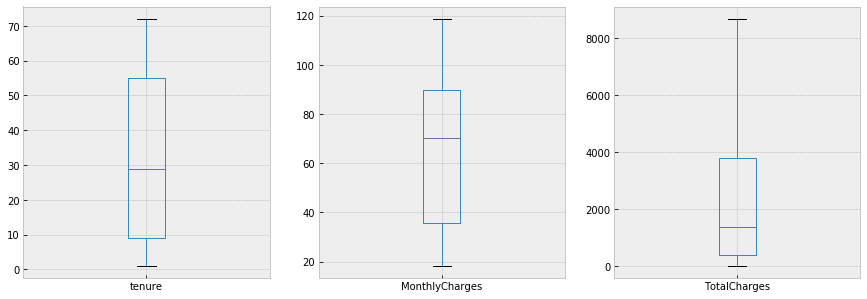

In [15]:
# box plots
plt.style.use('bmh')
numeric_ds.plot(kind='box',subplots=True, figsize=(15,5))
plt.plot()

[]

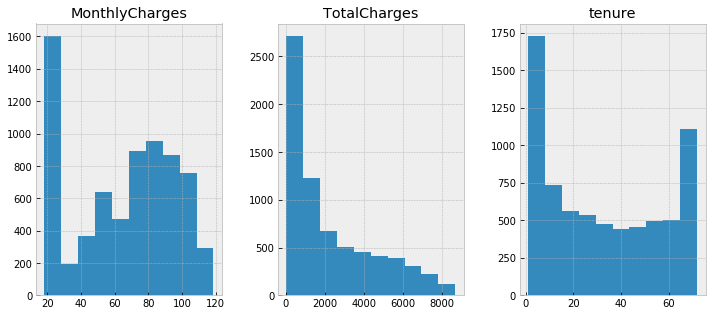

In [16]:
# histogram plots
numeric_ds.hist(layout=(1,3), figsize=(12,5))
plt.plot()

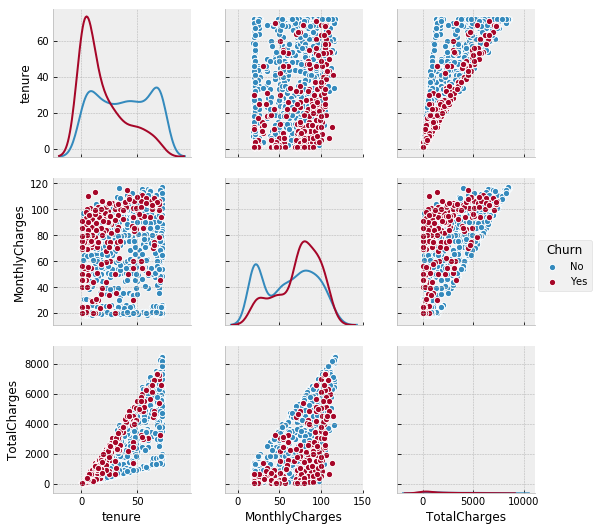

In [17]:
numeric_ds = pd.concat([numeric_ds,dataset["Churn"]],axis=1) #Add the 'Churn' variable to the numeric dataset

g = sns.PairGrid(numeric_ds.sample(n=1000), hue="Churn")
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=40)
g = g.map_diag(sns.kdeplot)
g = g.add_legend()

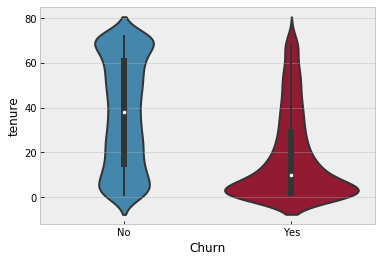

In [18]:
sns.violinplot(x="Churn", y="tenure", data=numeric_ds);

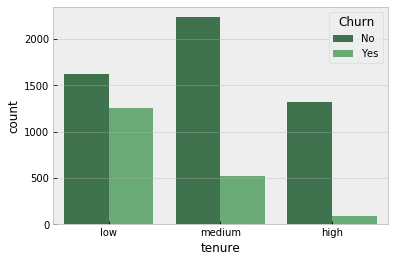

In [19]:
tenure_bins=pd.cut(numeric_ds["tenure"], bins=[0,20,60,80], labels=['low','medium','high'])
sns.countplot(x=tenure_bins, hue="Churn", data=numeric_ds, palette="Greens_d");

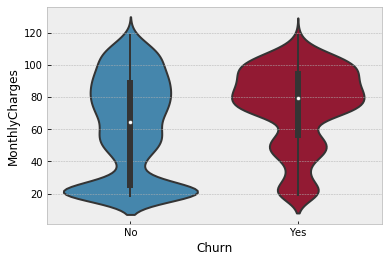

In [20]:
sns.violinplot(x="Churn", y="MonthlyCharges", data=numeric_ds);

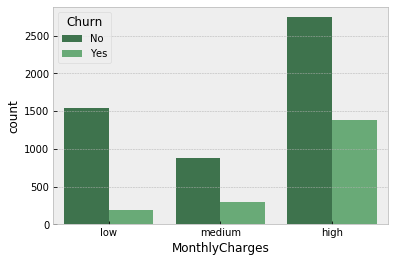

In [21]:
MonthlyCharges_bins=pd.cut(numeric_ds["MonthlyCharges"], bins=[0,35,60,130], labels=['low','medium','high'])
sns.countplot(x=MonthlyCharges_bins, hue="Churn", data=numeric_ds, palette="Greens_d")

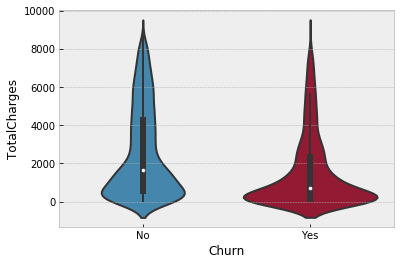

In [22]:
sns.violinplot(x="Churn", y="TotalCharges", data=numeric_ds)

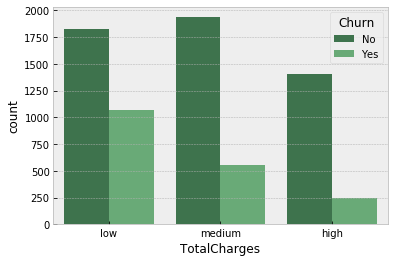

In [23]:
TotalCharges_bins=pd.cut(numeric_ds["TotalCharges"], bins=[0,1000,4000,10000], labels=['low','medium','high'])
sns.countplot(x=TotalCharges_bins, hue="Churn", data=numeric_ds, palette="Greens_d")

### Numeric vs Categorical Plots

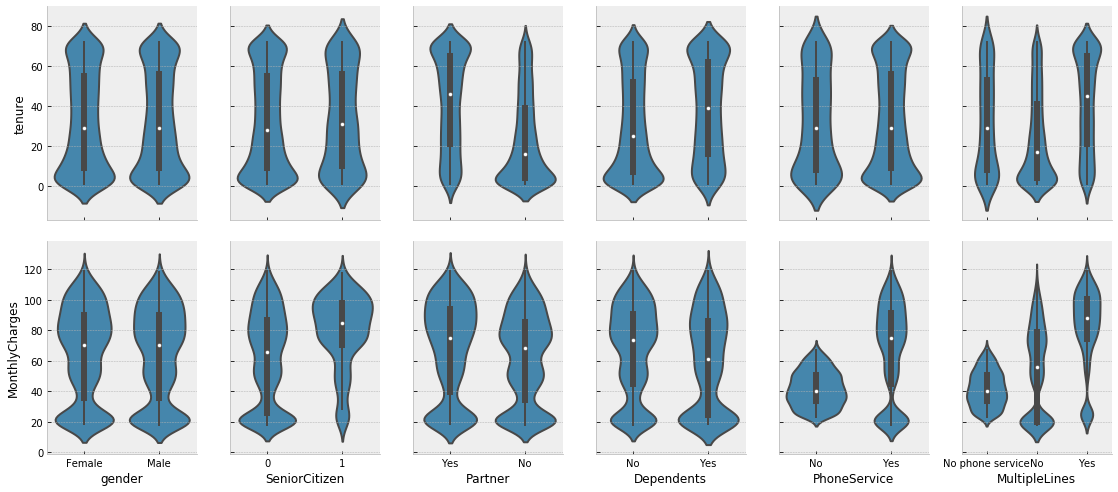

In [24]:
g = sns.PairGrid(dataset, x_vars=objects_ds.columns[0:6].values,
    y_vars=numeric_ds.columns[0:2].values, aspect=.75, size=3.5)
g.map(sns.violinplot)

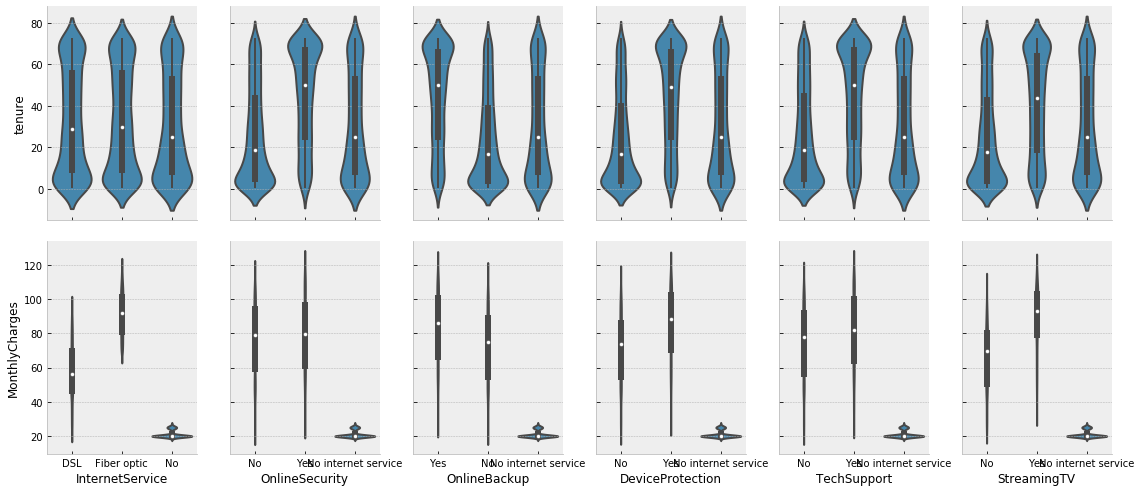

In [25]:
g = sns.PairGrid(dataset, x_vars=objects_ds.columns[6:12].values,  
    y_vars=numeric_ds.columns[0:2].values, aspect=.75, size=3.5)
g.map(sns.violinplot);

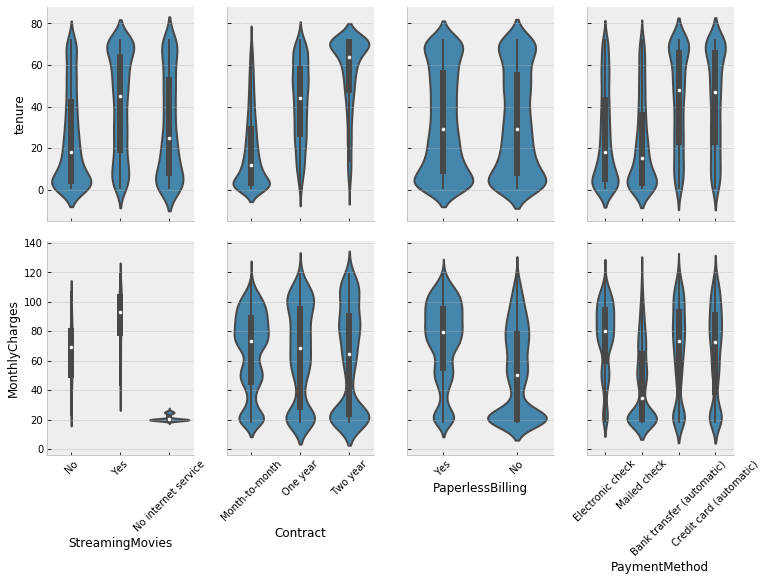

In [26]:
g = sns.PairGrid(dataset, x_vars=objects_ds.columns[12:16].values,
    y_vars=numeric_ds.columns[0:2].values, aspect=.75, size=3.5)
for ax in g.axes.flat:
   for tick in ax.get_xticklabels():
      tick.set_rotation(45)
g.map(sns.violinplot);

### Categorical Plots

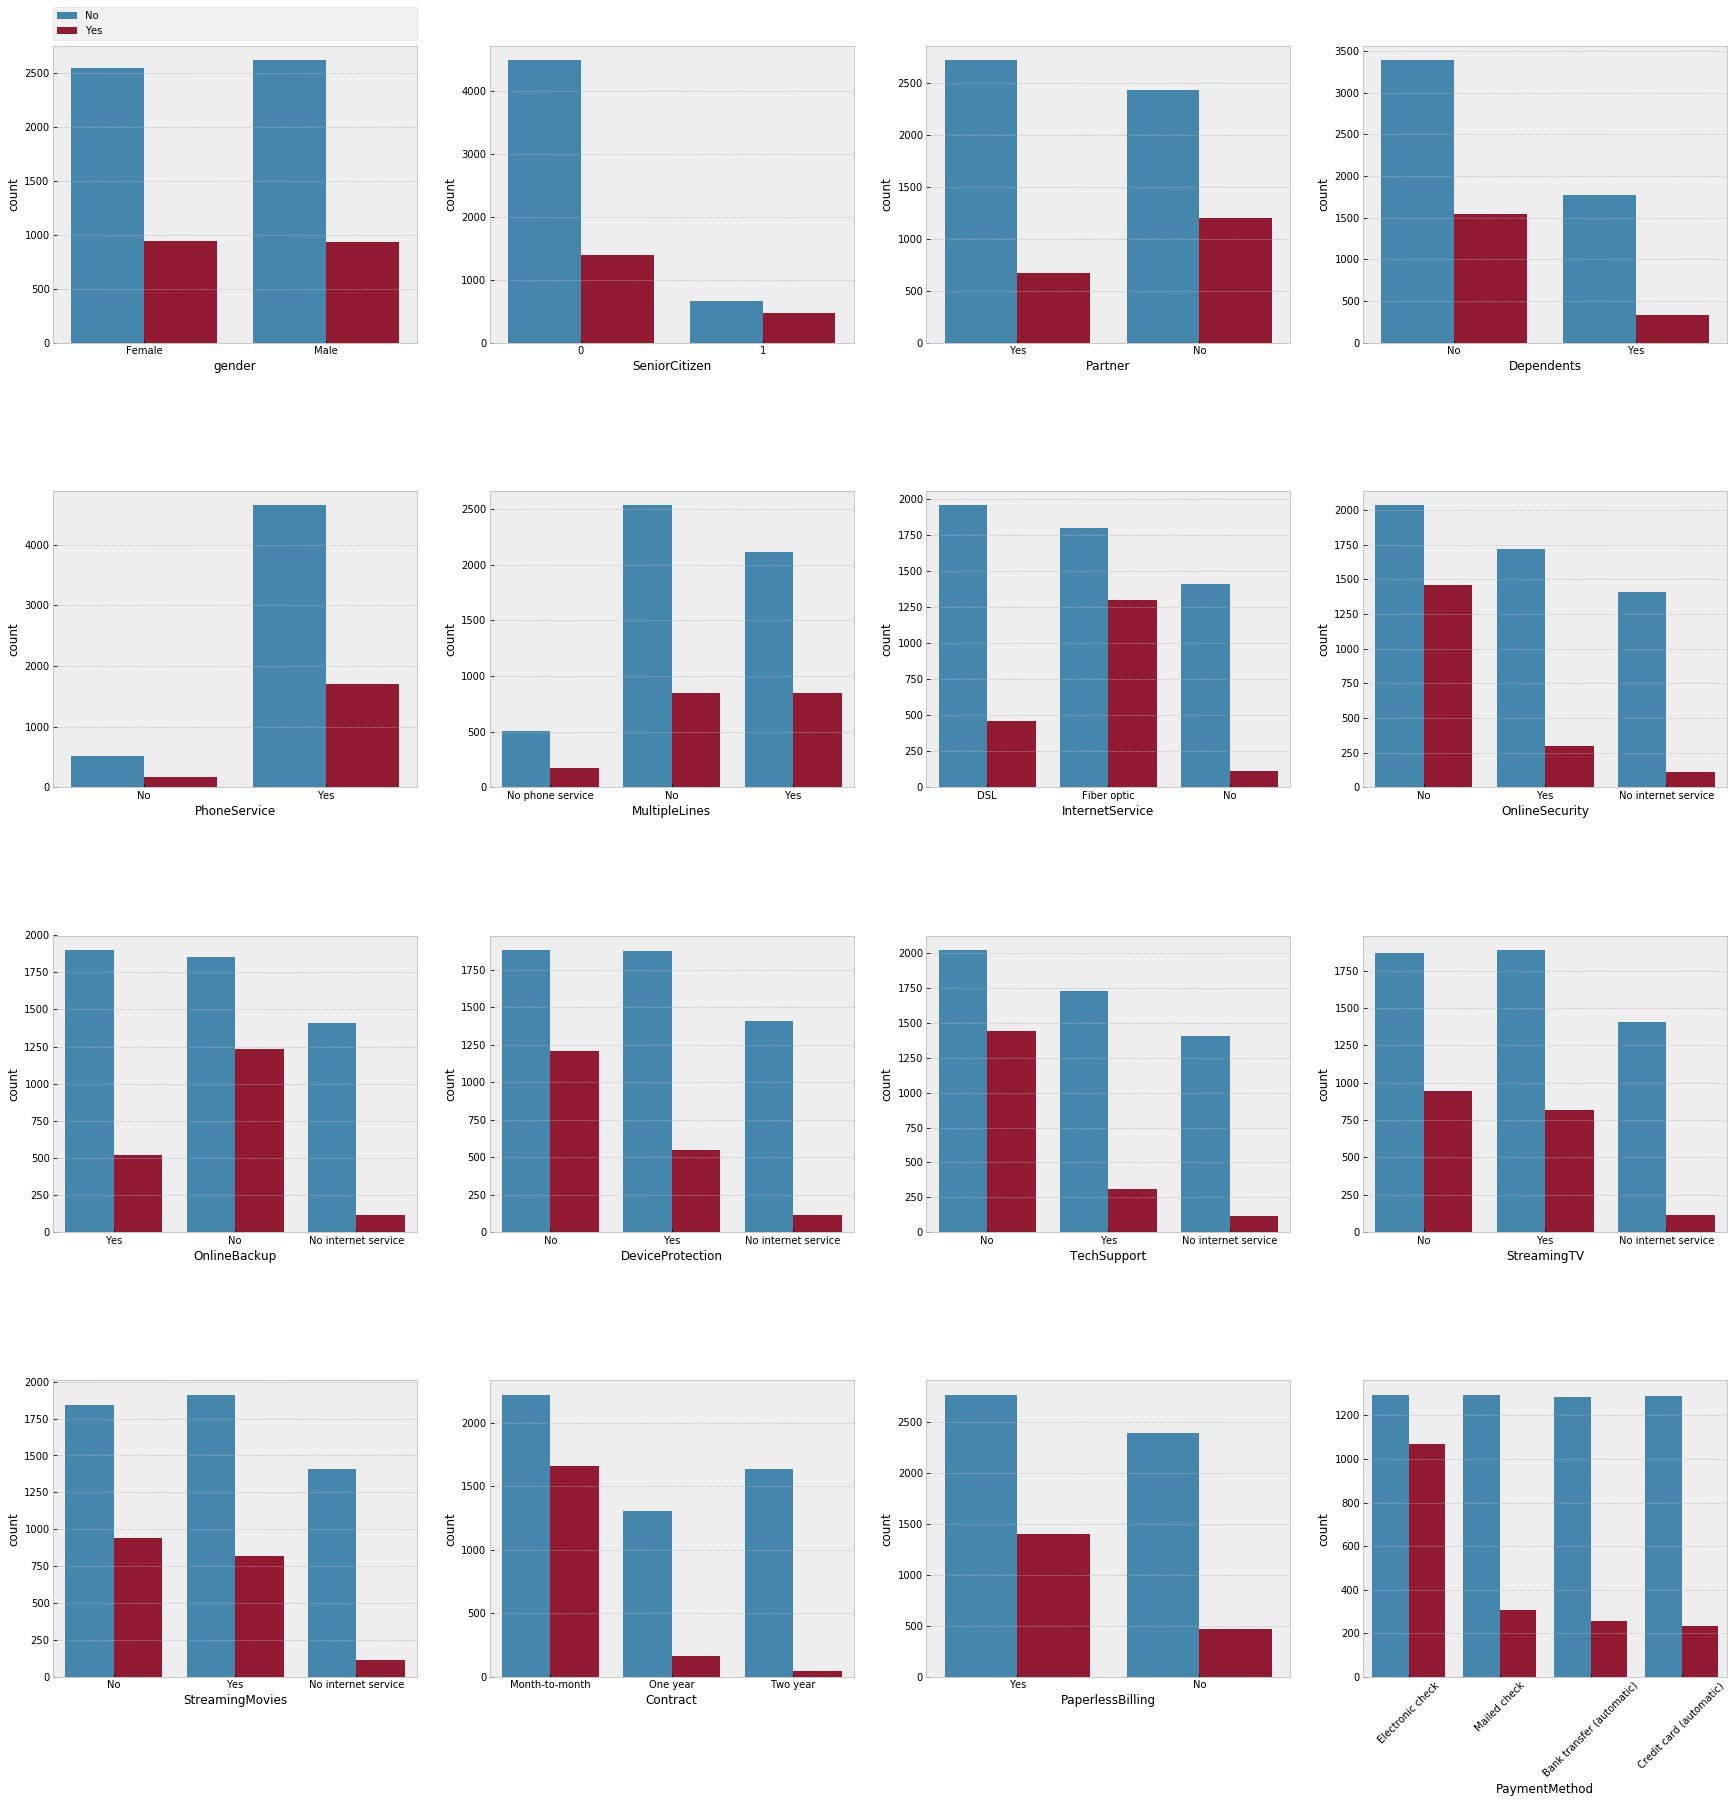

In [27]:
fig,ax =plt.subplots(4,4,figsize=(30,30))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=objects_ds.iloc[:,i], hue=objects_ds["Churn"], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(45)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [28]:
data=pd.concat([objects_ds],axis=1)
# Concatenate bins with object variables


for i in list(data.columns):
    data[i] = pd.Categorical(data[i]) 
# Convert all the variables into categorical

    
dummy = pd.get_dummies(data) 
# Transform the categorical variables into binary vectors

features = dummy.drop(["Churn_Yes", "Churn_No"], axis=1).columns

X = dummy[features].values
Y = dummy["Churn_Yes"].values

Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set

## Train Test Split

In [29]:
validation_size = 0.3
seed = 101

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

### Training and Predicting

In [30]:
# Make predictions on validation dataset
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
predictions = model.predict(X_validation)

### Evaluation

In [32]:
print("Accuracy score \n {}".format(accuracy_score(Y_validation, predictions)))

Accuracy score 
 0.7890995260663507


In [33]:
print("Confusion Matrix: \n {}".format(confusion_matrix(Y_validation, predictions)))

Confusion Matrix: 
 [[1397  183]
 [ 262  268]]


In [34]:
print("Classification Report: \n \n {}".format(classification_report(Y_validation, predictions)))

Classification Report: 
 
              precision    recall  f1-score   support

          0       0.84      0.88      0.86      1580
          1       0.59      0.51      0.55       530

avg / total       0.78      0.79      0.78      2110



In [35]:
coefs = np.std(X_train, 0)*model.coef_
df_imp = pd.DataFrame(coefs).T
df_imp.columns=["importance"]
df_imp["labels"] = features

df_imp['sort'] = df_imp['importance'].abs()
df_imp.sort_values(['sort'], ascending=[False]).head(10).reset_index()

,index,importance,labels,sort
0,34,0.546192,Contract_Month-to-month,0.546192
1,36,-0.510566,Contract_Two year,0.510566
2,13,-0.224880,InternetService_DSL,0.224880
3,14,0.179934,InternetService_Fiber optic,0.179934
4,18,-0.140466,OnlineSecurity_Yes,0.140466
5,5,-0.134790,Partner_Yes,0.134790
6,37,-0.133510,PaperlessBilling_No,0.133510
7,27,-0.127752,TechSupport_Yes,0.127752
8,40,-0.124141,PaymentMethod_Credit card (automatic),0.124141
9,41,0.114136,PaymentMethod_Electronic check,0.114136


### Positive correlation contributes to churn

### Negative correlation prevents churn

In [36]:
df_imp.sort_values(['sort'], ascending=[False]).tail()

,importance,labels,sort
38,-0.010782,PaperlessBilling_Yes,0.010782
11,-0.008297,MultipleLines_No phone service,0.008297
8,-0.008297,PhoneService_No,0.008297
33,-0.004735,StreamingMovies_Yes,0.004735
42,-0.002493,PaymentMethod_Mailed check,0.002493


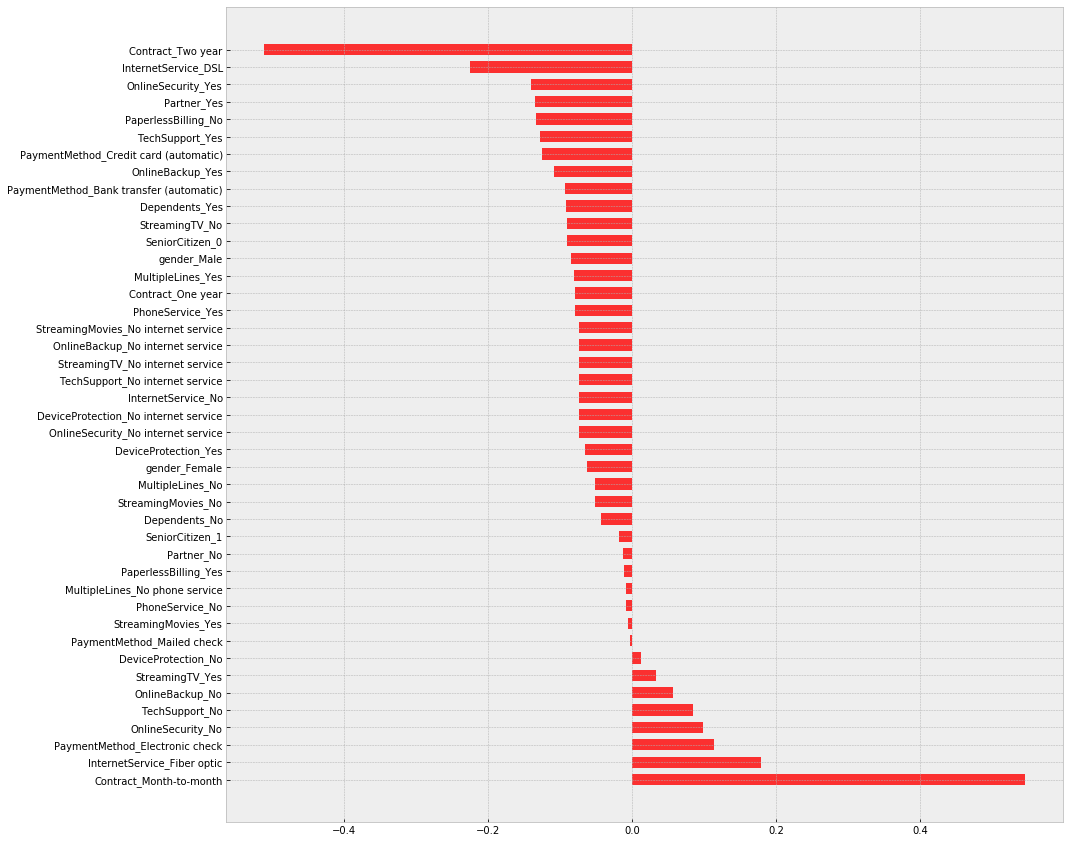

In [37]:
df_imp.sort_values("importance", inplace=True, ascending=False)
index = np.arange(len(df_imp))
fig = plt.figure(figsize=(15,15))
bar_width = 0.65
rects = plt.barh(index , df_imp["importance"], bar_width, alpha=0.8, color='r', label='Main')
plt.yticks(index, df_imp["labels"])
plt.show()